TP1 regression lineaire

Réalisé par Hiba ROMANE

In [1]:
import numpy as np

In [2]:
X = np.array([[6], [8], [10], [14], [18]])
y = [7, 9, 13, 17.5, 18]

In [3]:
X.shape

(5, 1)

In [4]:
X.shape

(5, 1)

In [5]:
n = len(X)
n

5

In [6]:
import matplotlib.pyplot as plt

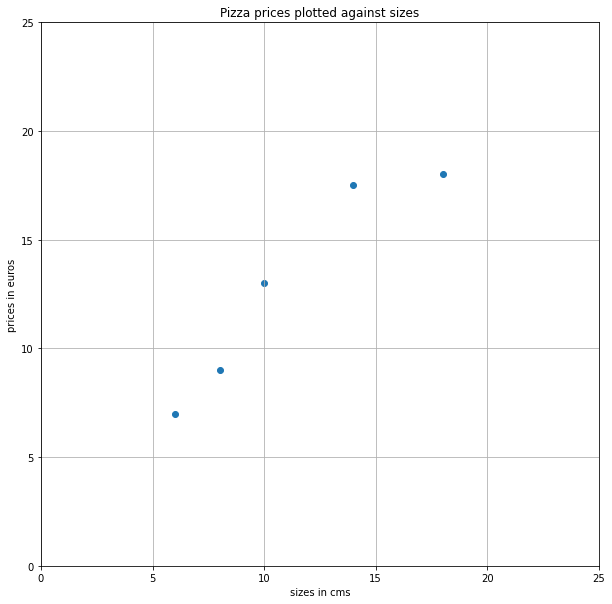

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([0,25,0,25])
ax.grid(True)
plt.scatter(X, y)
plt.xlabel('sizes in cms')
plt.ylabel('prices in euros')
plt.title('Pizza prices plotted against sizes')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = X.reshape((-1,1))


In [10]:
# Création d'un objet LinearRegression
model = LinearRegression()

# Apprentissage de la droite de régression linéaire
model.fit(X, y)

# Affichage des coefficients de la droite de régression linéaire
a = model.coef_
b = model.intercept_
print('Coefficients:', a)
print('Intercept:', b)

Coefficients: [0.9762931]
Intercept: 1.965517241379315


la fonction fit s'attend à ce que les tableaux X et Y soient dans le format d'un tableau numpy bidimensionnel. Dans cet exemple, nous avons utilisé la méthode reshape((-1, 1)) pour transformer le tableau X en un tableau bidimensionnel avec une seule colonne.

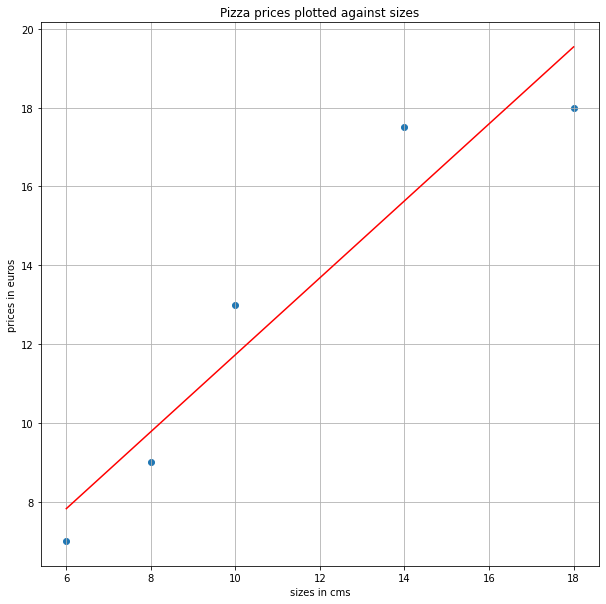

In [11]:
# Prédiction de Y pour toutes les valeurs de X
Y_pred = model.predict(X)

# Affichage du graphe
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(True)
plt.scatter(X, y) # points de données
plt.plot(X, Y_pred, color='red') # droite de régression linéaire
plt.xlabel('sizes in cms')
plt.ylabel('prices in euros')
plt.title('Pizza prices plotted against sizes')
plt.show()

In [12]:
# Calcul de la somme de l'erreur résiduelle
RSS = np.sum((y - Y_pred) ** 2)

# Affichage de la somme de l'erreur résiduelle
print('Somme de l\'erreur résiduelle:', RSS)

Somme de l'erreur résiduelle: 8.747844827586203


Nous souhaitons trouver les meilleurs paramètres α et β pour résoudre l’équation
y = αx + β (minimiser la fonction de coût)

In [13]:
#calculons la moyenne des X
x_ = np.mean(X)
x_

11.2

In [14]:
#calculons la moyenne des y
y_ = np.mean(y)
y_

12.9

In [15]:
var2 = np.sum((X - x_) ** 2)/(n-1)
var2

23.2

In [16]:
var = np.var(X, ddof=1)
var

23.2

La covariance mesure à quel point deux variables changent ensemble. Si les variables augmentent en même temps alors la covariance est positive, si l’une augmente et
l’autre diminue alors la covariance est négative. S’il n’existe aucune relation entre les
deux variables alors la covariance est nulle

In [17]:
#cov2 = np.sum((X - x_)*(y - y_))
#cov2 = cov2/(n-1)
#cov2

In [18]:
cov = np.cov(X.transpose(), y)[0][1]
cov

22.650000000000002

In [19]:
alpha = cov/var
alpha

0.976293103448276

In [20]:
model.coef_

array([0.9762931])

In [21]:
beta = y_ - alpha*x_
beta

1.9655172413793096

In [22]:
model.intercept_

1.965517241379315

pour eviter le surapprentissage

R-squared (coefficient dedétermination).

In [23]:
X1 = np.array([[8], [9], [11], [16], [12]])
y1 = [11,8.5,15,18,11]

In [24]:
y1_ = np.mean(y1)
y1_

12.7

In [25]:
# Création d'un objet LinearRegression
model1 = LinearRegression()

# Apprentissage de la droite de régression linéaire
model1.fit(X1, y1)

# Prédiction de Y pour toutes les valeurs de X
Y_pred1 = model.predict(X1)



In [26]:
from sklearn.metrics import r2_score

In [27]:
r2 = r2_score(y1, Y_pred1)
r2

0.6620052929422553

In [28]:
# Calcul de la somme de l'erreur résiduelle
RSS1 = np.sum((y1 - Y_pred1) ** 2)

SStot1 = np.sum((y1 - y1_) ** 2)
SStot1

56.8

In [29]:
R2 = 1 - (RSS1/SStot1)
R2

0.6620052929422553

In [30]:
SStot = np.sum((y - y_) ** 2)
SStot

97.19999999999999

In [31]:
R2 = 1 - (RSS/SStot)
R2

0.9100015964240102

In [32]:
r2 = r2_score(y, Y_pred)
r2

0.9100015964240102

on essaye de faire la regression lineaire manuellement

In [33]:
X = np.array([[6], [8], [10], [14], [18]])
y = [7, 9, 13, 17.5, 18]

In [34]:
y = np.array(y)
y.shape
y = y.reshape(y.shape[0],1)
y.shape

(5, 1)

In [35]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

In [36]:
X.shape

(5, 1)

In [37]:
X = np.hstack((X,np.ones(X.shape)))
X

array([[ 6.,  1.],
       [ 8.,  1.],
       [10.,  1.],
       [14.,  1.],
       [18.,  1.]])

initialiser les coefficients de la droite arbitrairement

In [38]:
theta = np.random.randn(2,1)
theta

array([[-0.48335033],
       [ 1.98188021]])

modele

In [39]:
# F= X.theta
def model(X,theta) :
    return X.dot(theta)

In [40]:
model(X,theta)

array([[-0.9182218 ],
       [-1.88492247],
       [-2.85162314],
       [-4.78502448],
       [-6.71842582]])

fonction cout

J(theta) = (1/2m)*somme((X.theta-Y)**2)

In [41]:
def cost_function(X,y,theta) :
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [42]:
cost_function(X,y,theta)

154.0076621224138

gradients et descente de Gradient

derive de J(theta) par rapport a theta = 1/m * XT *(X*theta - Y)

In [43]:
def grad(X,y,theta) :
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

descente de gradiant 

theta = theta - alpha*derive J(theta) par rapport a theta

In [44]:
def gradient_descent(X,y,theta,learning_rate,n_iterations) :
    for i in range(0,n_iterations) :
        theta = theta - learning_rate *grad(X,y,theta)
    return theta

entrainement du model

In [45]:
theta_final = gradient_descent(X,y,theta,learning_rate=0.001,n_iterations=1000000)

In [46]:
theta_final

array([[0.9762931 ],
       [1.96551724]])

In [47]:
print(a,b)

[0.9762931] 1.965517241379315


In [48]:
y = np.hstack((y,np.ones(y.shape)))
y

array([[ 7. ,  1. ],
       [ 9. ,  1. ],
       [13. ,  1. ],
       [17.5,  1. ],
       [18. ,  1. ]])

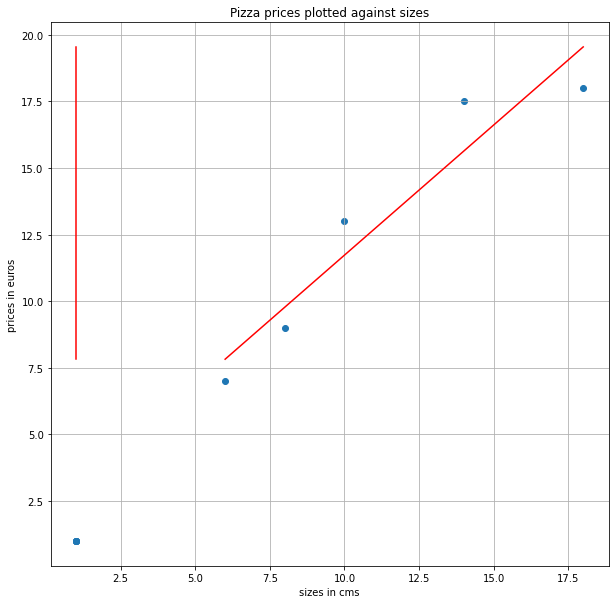

In [49]:
predictions = model(X, theta_final)
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(True)
plt.scatter(X, y) # points de données
plt.plot(X, predictions, color='red') # droite de régression linéaire
plt.xlabel('sizes in cms')
plt.ylabel('prices in euros')
plt.title('Pizza prices plotted against sizes')
plt.show()